In [2]:
import pandas as pd
import numpy as np
import string, re
import itertools
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
imdb_dataset = pd.read_csv("../Clean/lemma_result_imdb_data_text.csv")

imdb_dataset

,cleaned_review,Label
0,slow move aimless movie distress drift young man,0
1,sure lose flat character audience nearly half ...,0
2,attempt artiness black white clever camera ang...,0
3,little music anything speak,0
4,best scene movie gerardo try find song keep ru...,1
...,...,...
743,get bore watch jessice lange take clothe,0
744,unfortunately virtue film production work lose...,0
745,word embarrass,0
746,exceptionally bad,0


In [22]:
lens = imdb_dataset['cleaned_review'].str.len()
print(lens.mean(), lens.std(), lens.min(), lens.max())

66.09491978609626 234.4637170638658 3 4888


In [23]:
data = [go.Histogram(x=lens, xbins=dict(start=0, end=8000, size=50), marker=dict(color='#8c42f4'))]
layout = go.Layout(
                  title='Length of reviews distribution',                  
                  xaxis=dict(title='Length'),
                  yaxis=dict(title='Count'),
                  bargap=0.1)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='length histogram')

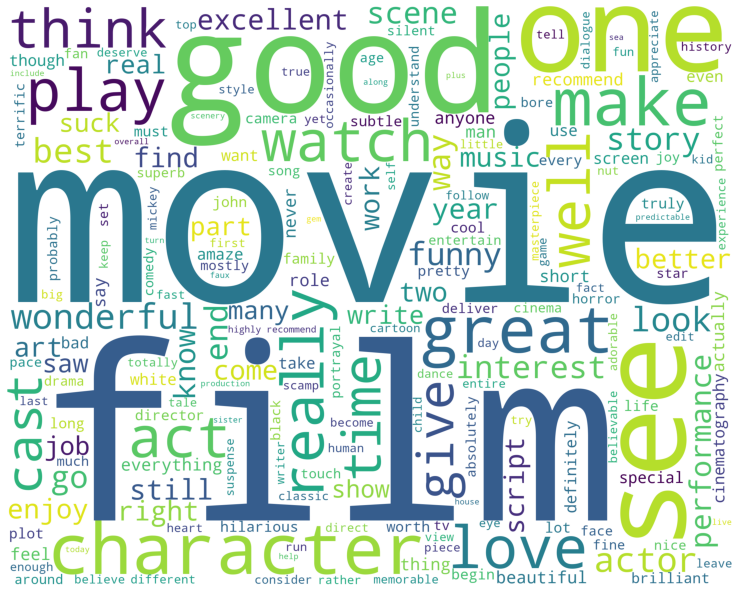

In [24]:
df_pos = imdb_dataset[ imdb_dataset['Label'] == 1]
df_pos = df_pos['cleaned_review']
df_neg = imdb_dataset[ imdb_dataset['Label'] == 0]
df_neg = df_neg['cleaned_review']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

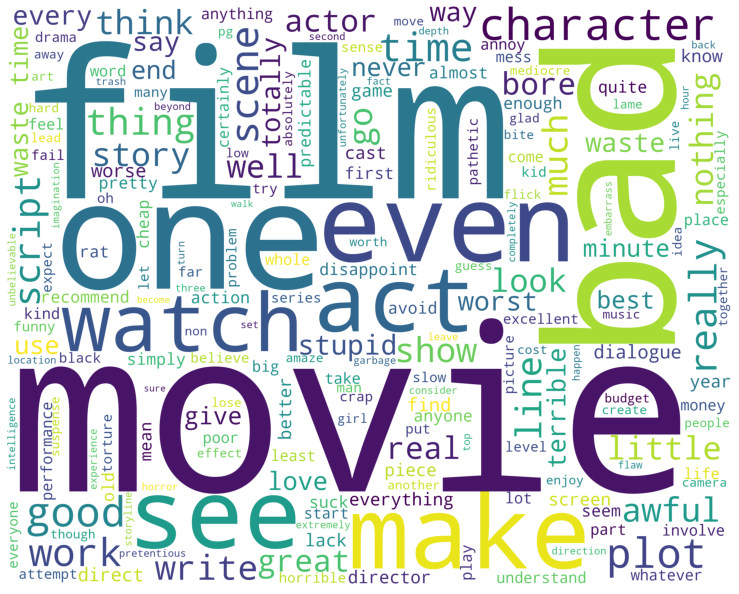

In [25]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()